In [57]:
!pip install --user -U nltk
!pip install gensim

import pandas as pd
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


from nltk import ngrams
from nltk.tokenize import word_tokenize

nltk.download('punkt')


Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
/usr/share/python-wheels/urllib3-1.25.8-py2.py3-none-any.whl/urllib3/connectionpool.py:999: InsecureRequestWarning: Unverified HTTPS request is being made to host 'pypi.ngc.nvidia.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
Requirement already up-to-date: nltk in /home/owenkutzscher/.local/lib/python3.8/site-packages (3.8.1)
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


[nltk_data] Downloading package punkt to
[nltk_data]     /home/owenkutzscher/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### Clean the data

In [58]:
# Read the CSV file
df_extra_params = pd.read_csv("../data/Reviews.csv")

# Select only the "Score" and "Text" columns
df_unbalanced = df_extra_params[["Score", "Text"]]

# Determine minimum number of reviews for any score
min_reviews = df_unbalanced['Score'].value_counts().min()

def create_subset(data, fraction):
    subset_data = data.sample(frac=fraction)
    return subset_data

# Split the data into five groups with an equal number of reviews in each group
df_grouped = df_unbalanced.groupby('Score', group_keys=False).apply(lambda x: x.sample(min_reviews))






# Apply the fraction parameter to each group
fraction_to_keep = 0.4
# You adjust this fraction as needed, the data is decently uniform,
# don't be affraid to make it small ex: 0.1
df = df_grouped.groupby('Score').apply(lambda x: create_subset(x, fraction_to_keep)).reset_index(drop=True)








# Display the resulting DataFrame
df.head()

# # Display number of reviews
# print("The number of rows is", len(df))



,Score,Text
0,1,"It was a sticky mess, I called the company and..."
1,1,I read about these on [...] and decided to try...
2,1,Just bought the new keurig vue after having an...
3,1,This is the worse salty licorice I have ever t...
4,1,The tea is definitely a step up from regular t...


In [59]:
# Remove NaN values and lowercase the text
df = df.dropna(subset=['Text']).copy()
df['Text'] = df['Text'].str.lower()

# Display the resulting DataFrame
df.head()

,Score,Text
0,1,"it was a sticky mess, i called the company and..."
1,1,i read about these on [...] and decided to try...
2,1,just bought the new keurig vue after having an...
3,1,this is the worse salty licorice i have ever t...
4,1,the tea is definitely a step up from regular t...


In [60]:
# split into train and test sets

X_train, X_test, y_train, y_test = train_test_split(df['Text'], df['Score'], test_size=0.2)


### Get n-grams from data

In [68]:
# Use NLTK to extract n-gram features from the data

def extract_ngrams(text, n):
    tokens = word_tokenize(text)
    n_grams = ngrams(tokens, n)
    return [' '.join(gram) for gram in n_grams]

# Example: Extract bigram features
X_train_ngrams = X_train.apply(lambda x: extract_ngrams(x, 5))
X_test_ngrams = X_test.apply(lambda x: extract_ngrams(x, 5))


### Convert n-grams to feature vectors

In [69]:
# Convert N-Grams to Feature Vectors

# I have made a few options for converting to feature vectors
# uncomment the option you'd like to use
# Note that no vectorizaiton method was signifigantly better than others



"""
# Use scikitlearn's: CountVectorizer
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train_ngrams.apply(lambda x: ' '.join(x)))
X_test_vectorized = vectorizer.transform(X_test_ngrams.apply(lambda x: ' '.join(x)))
"""
# Use scikitlearn's: TfidfVectorizer
# Notes: With Random Forest: this makes the model take a long time to train!! (4x the CountVectorizer training time!)
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2))
X_train_vectorized = tfidf_vectorizer.fit_transform(X_train_ngrams.apply(lambda x: ' '.join(x)))
X_test_vectorized = tfidf_vectorizer.transform(X_test_ngrams.apply(lambda x: ' '.join(x)))








KeyboardInterrupt: 

# Using models to classify reviews

### Models used: Random Forest, SVM

### Random Forest

In [42]:


# Fine tuning the model
# This was not really worth it... Gave a small 2% performance boost.
# Increasing number of trees past 100 causes overfitting, makes a large bias twords positive reviews

# Uncomment this to train random forests with some different paramaters








# # Here we will make some funcitons/for loops to test out different what will happen if we change certain paramaters

# def train_random_forest(X_train, y_train, X_test, y_test, n_estimators, max_depth):
#     # Create a Random Forest classifier with specified parameters
#     rf_model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=69)

#     # Train the model

#     rf_classifier = RandomForestClassifier(n_estimators=100)
#     rf_classifier.fit(X_train_vectorized, y_train)

#     # Make predictions on the test set
#     y_pred = rf_classifier.predict(X_test_vectorized)


#     # Evaluate the model
#     accuracy = accuracy_score(y_test, y_pred)
    
#     return accuracy

# # Parameter values we will expirament with
# n_estimators_values = [150, 200, 250]
# max_depth_values = [None, 10, 20]

# # Iterate over parameter combinations
# for n_estimators in n_estimators_values:
#     for max_depth in max_depth_values:
#         # Call the function with the current parameter combination
#         accuracy = train_random_forest(X_train, y_train, X_test, y_test, n_estimators, max_depth)

#         # Print or store the results
#         print(f"Accuracy for n_estimators={n_estimators}, max_depth={max_depth}: {accuracy}")


In [43]:
# Train the Random Forest Classifier

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=69)
# rf_classifier = RandomForestClassifier(n_estimators=100, random_state=69)
rf_classifier.fit(X_train_vectorized, y_train)


RandomForestClassifier(random_state=69)

Accuracy: 0.45330870003359086
Model is off by an average of 1.56069134487479 stars (RMSE)
Normalized RMSE: 0.3901728362186975


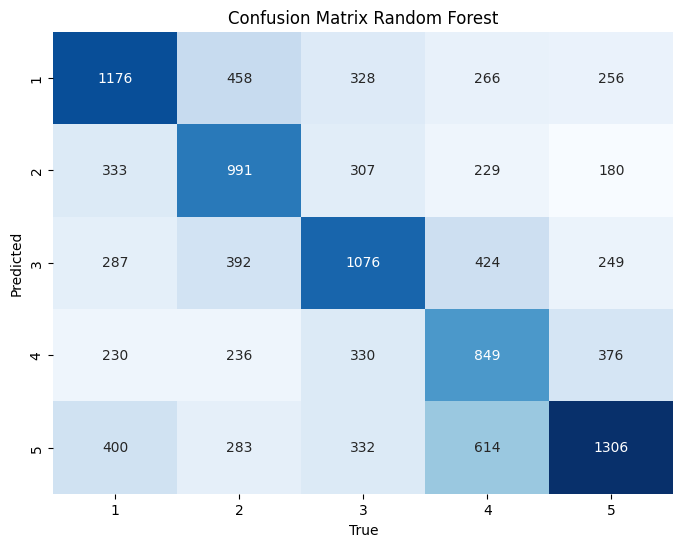

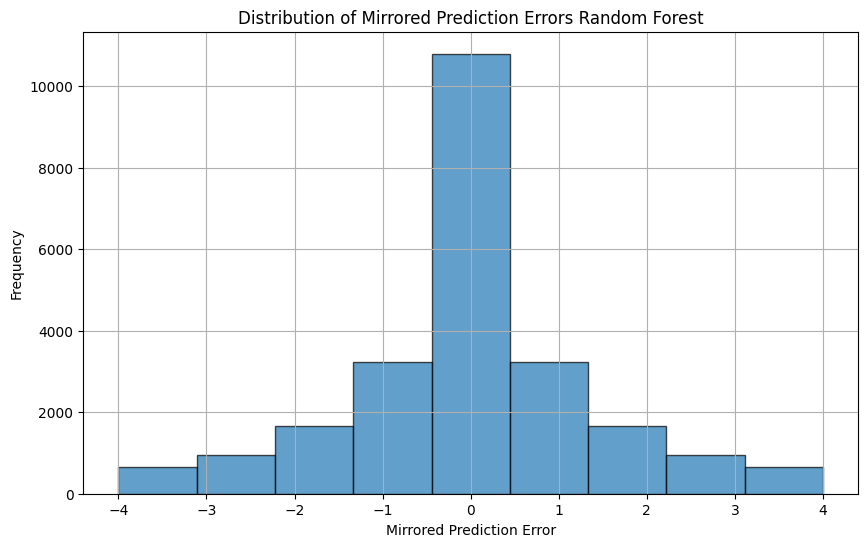

In [52]:
# Evaluate the Model

# I'll be measuring performance using Accuracy (becuase its literally acuracy)
# and Normalized Root Mean Squared Error
# since it gives a good measure of how good the model is at
# predicting around the right answer. 
# NOTE I got these numbers with 0.2 of the entire data set

# This is a good metric becuase many reviews are similar and overall review
# ratins are by nature are a little inconsistent and noisy.
# Humans are just inconsistent at rating things lol.
# Ex: This Batman toy was ok for my son. He enjoyed playing with it for a couple days
# Predicted stars: 3
# Actual stars: 2

y_pred = rf_classifier.predict(X_test_vectorized)







print("Accuracy:", accuracy_score(y_test, y_pred))
# print("\nClassification Report:\n", classification_report(y_test, y_pred))








# Root mean squared error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Model is off by an average of", rmse, "stars (RMSE)")
normalized_rmse = rmse / (max(y_test) - min(y_test))
print("Normalized RMSE:", normalized_rmse)







# From this hart we can see that the model is the best at predicting 1 and 5 star reviews
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a DataFrame for the confusion matrix
conf_matrix_df = pd.DataFrame(conf_matrix, index=range(1, 6), columns=range(1, 6))

# Display the raw confusion matrix
# print("\nConfusion Matrix:\n", conf_matrix_df)

# Create a heatmap using seaborn with swapped axes
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_df.T, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix Random Forest')
plt.xlabel('True')
plt.ylabel('Predicted')
plt.show()











# Calculate prediction errors
errors = y_pred - y_test

# Create a mirrored version of the errors
mirrored_errors = -errors

# Concatenate the original and mirrored errors
all_errors = np.concatenate([errors, mirrored_errors])

# Plot histogram of errors
plt.figure(figsize=(10, 6))
plt.hist(all_errors, bins=9, edgecolor='black', alpha=0.7)
plt.title('Distribution of Mirrored Prediction Errors Random Forest')
plt.xlabel('Mirrored Prediction Error')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()





### SVM: SVC (Support Vector Classification)

In [8]:
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.kernel_approximation import Nystroem
from sklearn.svm import SVC


In [9]:
# First lets test out some SVCs




# Create an SVM classifier
"""
# C-Support Vector Classification
svm_classifier = SVC(kernel='linear')  # You can choose different kernels like 'linear', 'rbf', 'poly', etc.
"""
# Linear Support Vector Classification (not as good but way faster to train!)
# This becomes VERY accurate on large ammounts of data! And it's still super fast to train!
svm_classifier = LinearSVC()







# Train the SVM classifier
svm_classifier.fit(X_train_vectorized, y_train)

/home/owenkutzscher/.local/lib/python3.8/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/owenkutzscher/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

Accuracy: 0.5258649647295935
Model is off by an average of 1.2308322120264434 stars (RMSE)
Normalized RMSE: 0.30770805300661086


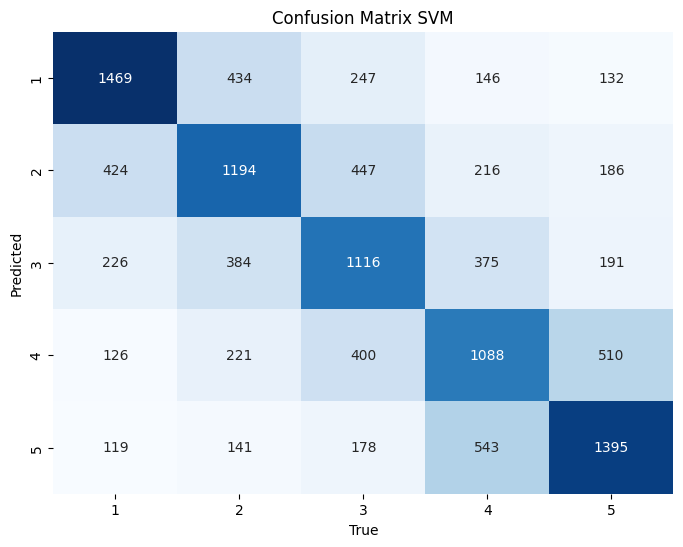

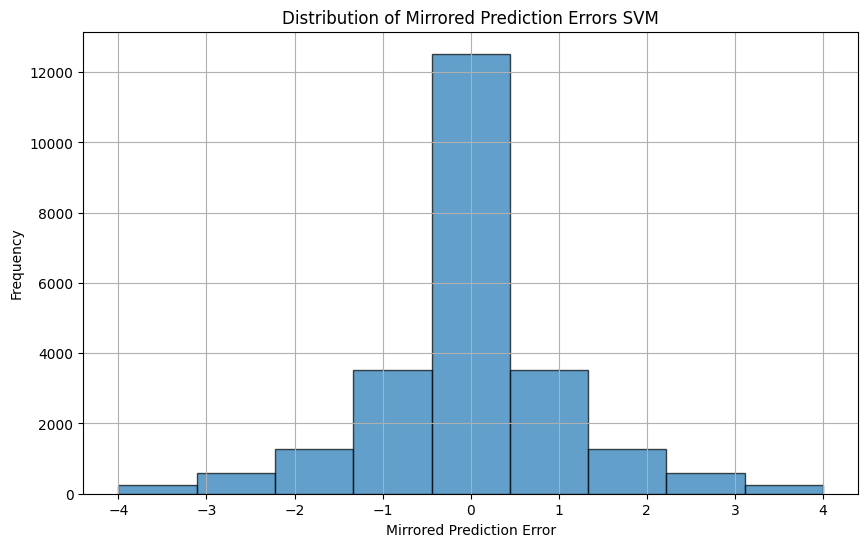

In [10]:
# Overall the SVM model performs great
# It performs differently than the random forest

# It's like this: Random Forest predicts the correct review more often, but when it's wrong, its often far off from the correct value
# SVM doesn't predict the correct review as often, but it's never very off from the correct value
# Also, compared to the Random Forest it is better at predicting 2,3,4 star reviews
# and worse at predicting 1 and 5 star reviews

# On larger ammounts of data it performs better than random forest including in terms of accuracy!





# Make predictions on the test set
y_pred = svm_classifier.predict(X_test_vectorized)


'''
# Sanity check: check out the crazy outliars
# Make sure it makes a little bit of sense that the model is predicting some 5 star reviews as 1 and vise versa
# Print the reviews for heavy outliers, at most 10 for each category
count_1_star = 0
count_5_star = 0

for true_label, predicted_label, review_text in zip(y_test, y_pred, X_test):
    if true_label == 5 and predicted_label == 1 and count_5_star < 3:
        print("\nPredicted: 1 star, True: 5 stars\nReview Text:", review_text)
        count_5_star += 1
    elif true_label == 1 and predicted_label == 5 and count_1_star < 3:
        print("\nPredicted: 5 stars, True: 1 star\nReview Text:", review_text)
        count_1_star += 1
'''





print("Accuracy:", accuracy_score(y_test, y_pred))
# print("\nClassification Report:\n", classification_report(y_test, y_pred))





# Root mean squared error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Model is off by an average of", rmse, "stars (RMSE)")
normalized_rmse = rmse / (max(y_test) - min(y_test))
print("Normalized RMSE:", normalized_rmse)




# From this hart we can see that the model is the best at predicting 1 and 5 star reviews
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a DataFrame for the confusion matrix
conf_matrix_df = pd.DataFrame(conf_matrix, index=range(1, 6), columns=range(1, 6))

# Display the raw confusion matrix
# print("\nConfusion Matrix:\n", conf_matrix_df)

# Create a heatmap using seaborn with swapped axes
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_df.T, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix SVM')
plt.xlabel('True')
plt.ylabel('Predicted')
plt.show()





# Calculate prediction errors
errors = y_pred - y_test

# Create a mirrored version of the errors
mirrored_errors = -errors

# Concatenate the original and mirrored errors
all_errors = np.concatenate([errors, mirrored_errors])

# Plot histogram of errors
plt.figure(figsize=(10, 6))
plt.hist(all_errors, bins=9, edgecolor='black', alpha=0.7)
plt.title('Distribution of Mirrored Prediction Errors SVM')
plt.xlabel('Mirrored Prediction Error')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [47]:
# Lets use a Nystroem transformer so we can train on more data

# NOTE Oh god this makes the model perform horribly!!
# The model is good at predicting 1 and 5 star reviews but nothing else!
# It it especially bad at 3 star reviews now, predicting barley any of them correctly

# First we will use a kernal approximator so we can train on a large ammount of data quickly

# Use Nystroem to approximate the kernel matrix (data gets manipulated, makes it so the kernal can )
nystroem_transformer = Nystroem(kernel='linear', n_components=600, random_state=69)
X_train_nystroem = nystroem_transformer.fit_transform(X_train_vectorized)
X_test_nystroem = nystroem_transformer.transform(X_test_vectorized)
# Expiraments: n_components= 300 horrible barley gets anything right as far as 3 star reviews!! 
# 600 horrible and doesn't get really anything right, appears to guess randomly, but good at guessing 5 star reviews









# Create an SVM classifier
"""
# C-Support Vector Classification (with the Nystroem stuff this takes twice as long to train than with no Nystroem)
svm_classifier = SVC(kernel='linear')  # You can choose different kernels like 'linear', 'rbf', 'poly', etc.
"""
# Linear Support Vector Classification (not as good but way faster to train!)
svm_classifier_nystroem = LinearSVC()







# Train the SVM classifier
svm_classifier_nystroem.fit(X_train_nystroem, y_train)

/home/owenkutzscher/.local/lib/python3.8/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/owenkutzscher/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

Accuracy: 0.34959690964057777
Model is off by an average of 1.7335531672865427 stars (RMSE)
Normalized RMSE: 0.4333882918216357


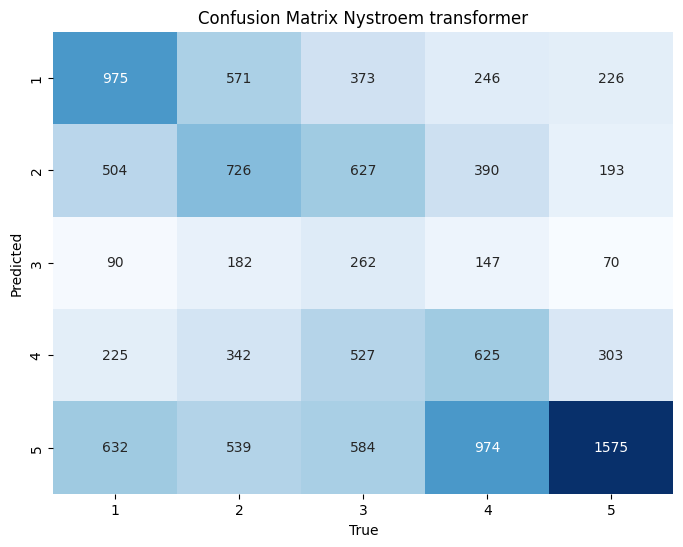

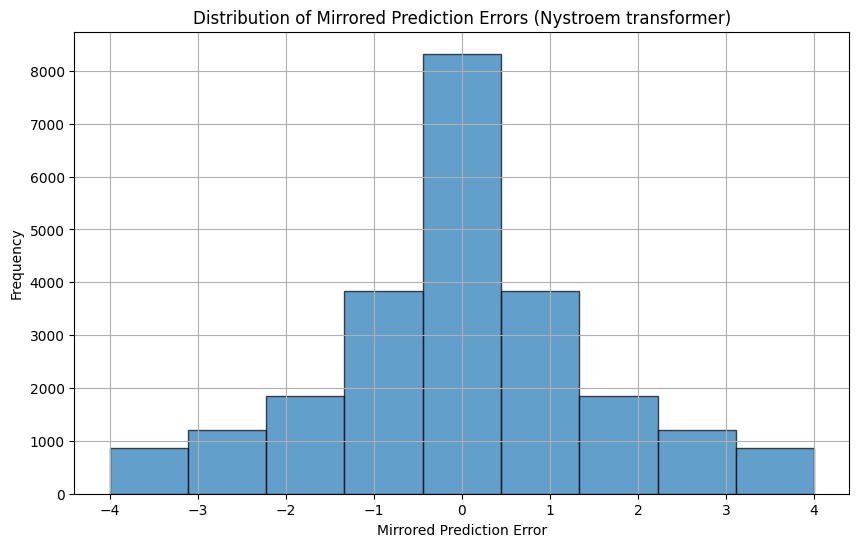

In [48]:





# Make predictions on the test set
y_pred = svm_classifier_nystroem.predict(X_test_nystroem)


print("Accuracy:", accuracy_score(y_test, y_pred))
# print("\nClassification Report:\n", classification_report(y_test, y_pred))





# Root mean squared error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Model is off by an average of", rmse, "stars (RMSE)")
normalized_rmse = rmse / (max(y_test) - min(y_test))
print("Normalized RMSE:", normalized_rmse)




# From this hart we can see that the model is the best at predicting 1 and 5 star reviews
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a DataFrame for the confusion matrix
conf_matrix_df = pd.DataFrame(conf_matrix, index=range(1, 6), columns=range(1, 6))

# Display the raw confusion matrix
# print("\nConfusion Matrix:\n", conf_matrix_df)

# Create a heatmap using seaborn with swapped axes
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_df.T, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix Nystroem transformer')
plt.xlabel('True')
plt.ylabel('Predicted')
plt.show()





# Calculate prediction errors
errors = y_pred - y_test

# Create a mirrored version of the errors
mirrored_errors = -errors

# Concatenate the original and mirrored errors
all_errors = np.concatenate([errors, mirrored_errors])

# Plot histogram of errors
plt.figure(figsize=(10, 6))
plt.hist(all_errors, bins=9, edgecolor='black', alpha=0.7)
plt.title('Distribution of Mirrored Prediction Errors (Nystroem transformer)')
plt.xlabel('Mirrored Prediction Error')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


### Naive Bayesian Classifier

In [70]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.metrics import accuracy_score, classification_report

# Note they load up in under a second!!!
# Since these models load so fast we can expirament with different n-gram sizes very easily
# And we can also expirament with using different vectorization techniques




In [ ]:
# Note
# TfidfVectorizer works absurdly well and allows the model to accuratly predict seemingly ambiguous reviews
# for example, it will be super good at predicting 1,3 and 5 star reviews.
# With this we can get some of the best performance from any model.


# Train the Multinomial Naive Bayes classifier
classifier_MultinomialNB = MultinomialNB()
classifier_MultinomialNB.fit(X_train_vectorized, y_train)



MultinomialNB()

Accuracy: 0.5429963050050386
Model is off by an average of 1.0292171168895095 stars (RMSE)
Normalized RMSE: 0.25730427922237736


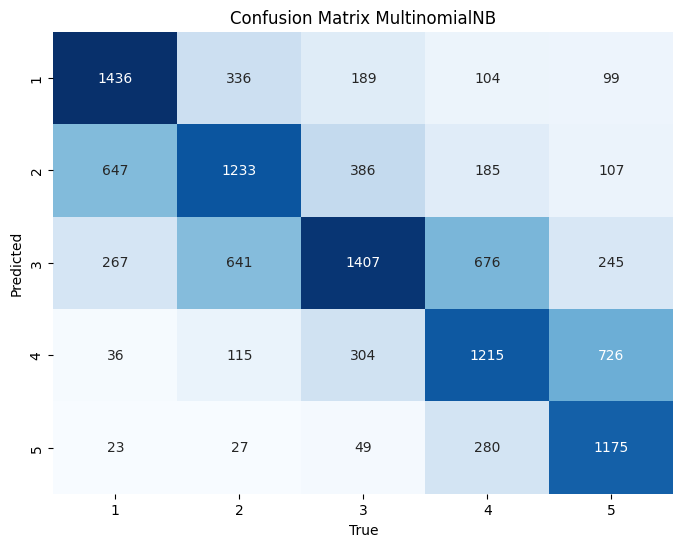

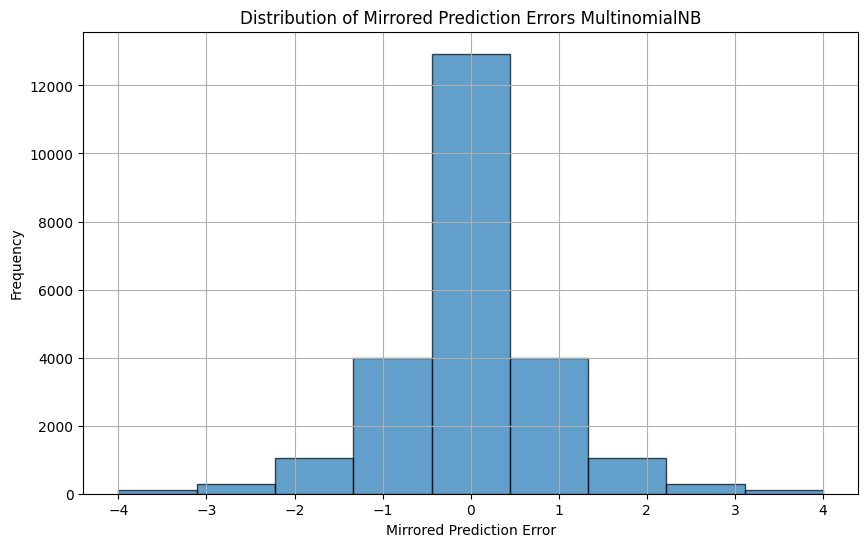

In [ ]:
# Model performance
# Wow!! performs nearly just as good as SVM but takes 0 seconds to train, even on the entire data set!!!


# Make predictions on the test set
y_pred = classifier_MultinomialNB.predict(X_test_vectorized)



'''
# Sanity check: check out the crazy outliars
# Make sure it makes a little bit of sense that the model is predicting some 5 star reviews as 1 and vise versa
# Print the reviews for heavy outliers, at most 10 for each category
count_1_star = 0
count_5_star = 0

for true_label, predicted_label, review_text in zip(y_test, y_pred, X_test):
    if true_label == 5 and predicted_label == 1 and count_5_star < 3:
        print("\nPredicted: 1 star, True: 5 stars\nReview Text:", review_text)
        count_5_star += 1
    elif true_label == 1 and predicted_label == 5 and count_1_star < 3:
        print("\nPredicted: 5 stars, True: 1 star\nReview Text:", review_text)
        count_1_star += 1
'''





print("Accuracy:", accuracy_score(y_test, y_pred))
# print("\nClassification Report:\n", classification_report(y_test, y_pred))





# Root mean squared error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Model is off by an average of", rmse, "stars (RMSE)")
normalized_rmse = rmse / (max(y_test) - min(y_test))
print("Normalized RMSE:", normalized_rmse)




# From this hart we can see that the model is the best at predicting 1 and 5 star reviews
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a DataFrame for the confusion matrix
conf_matrix_df = pd.DataFrame(conf_matrix, index=range(1, 6), columns=range(1, 6))

# Display the raw confusion matrix
# print("\nConfusion Matrix:\n", conf_matrix_df)

# Create a heatmap using seaborn with swapped axes
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_df.T, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix MultinomialNB')
plt.xlabel('True')
plt.ylabel('Predicted')
plt.show()





# Calculate prediction errors
errors = y_pred - y_test

# Create a mirrored version of the errors
mirrored_errors = -errors

# Concatenate the original and mirrored errors
all_errors = np.concatenate([errors, mirrored_errors])

# Plot histogram of errors
plt.figure(figsize=(10, 6))
plt.hist(all_errors, bins=9, edgecolor='black', alpha=0.7)
plt.title('Distribution of Mirrored Prediction Errors MultinomialNB')
plt.xlabel('Mirrored Prediction Error')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [ ]:

# Train the Complement Naive Bayes Classifier
classifier_ComplementNB = ComplementNB()
classifier_ComplementNB.fit(X_train_vectorized, y_train)



# Performance


ComplementNB()

Accuracy: 0.5885959019146793
Model is off by an average of 1.0717460380318418 stars (RMSE)
Normalized RMSE: 0.26793650950796044


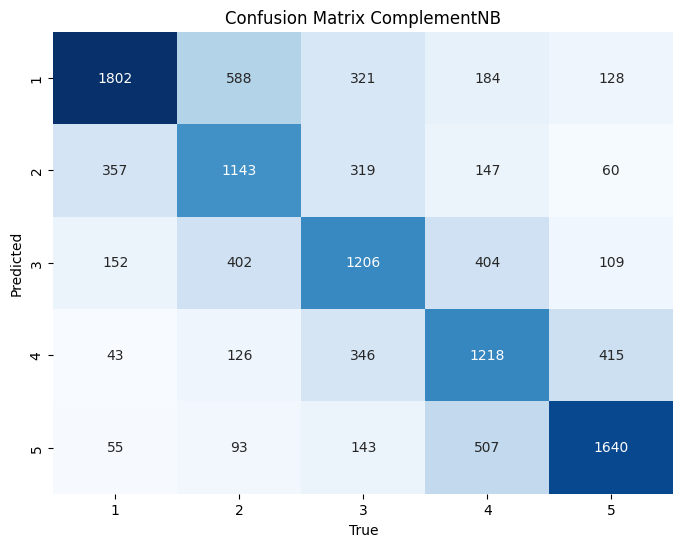

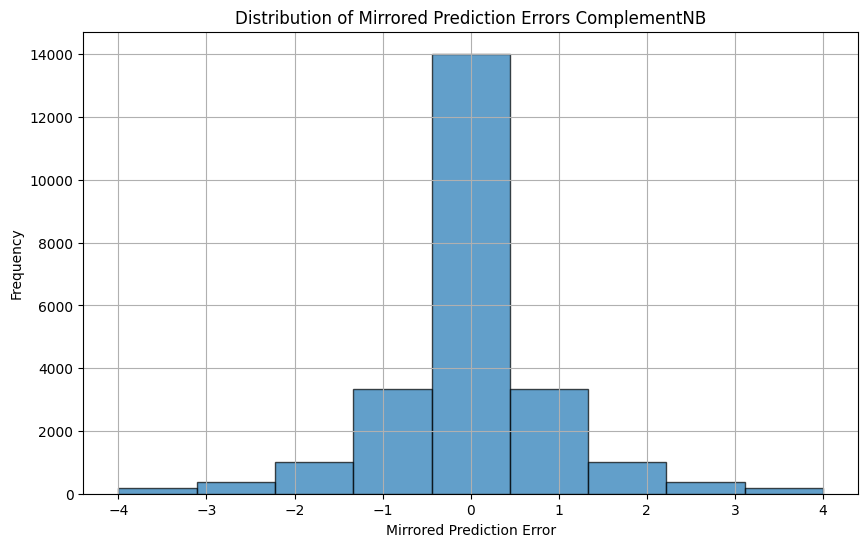

In [ ]:
# Model performance
# Wow!! performs nearly just as good as SVM but takes 0 seconds to train, even on the entire data set!!!


# Make predictions on the test set
y_pred = classifier_ComplementNB.predict(X_test_vectorized)



'''
# Sanity check: check out the crazy outliars
# Make sure it makes a little bit of sense that the model is predicting some 5 star reviews as 1 and vise versa
# Print the reviews for heavy outliers, at most 10 for each category
count_1_star = 0
count_5_star = 0

for true_label, predicted_label, review_text in zip(y_test, y_pred, X_test):
    if true_label == 5 and predicted_label == 1 and count_5_star < 3:
        print("\nPredicted: 1 star, True: 5 stars\nReview Text:", review_text)
        count_5_star += 1
    elif true_label == 1 and predicted_label == 5 and count_1_star < 3:
        print("\nPredicted: 5 stars, True: 1 star\nReview Text:", review_text)
        count_1_star += 1
'''





print("Accuracy:", accuracy_score(y_test, y_pred))
# print("\nClassification Report:\n", classification_report(y_test, y_pred))





# Root mean squared error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Model is off by an average of", rmse, "stars (RMSE)")
normalized_rmse = rmse / (max(y_test) - min(y_test))
print("Normalized RMSE:", normalized_rmse)




# From this hart we can see that the model is the best at predicting 1 and 5 star reviews
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a DataFrame for the confusion matrix
conf_matrix_df = pd.DataFrame(conf_matrix, index=range(1, 6), columns=range(1, 6))

# Display the raw confusion matrix
# print("\nConfusion Matrix:\n", conf_matrix_df)

# Create a heatmap using seaborn with swapped axes
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_df.T, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix ComplementNB')
plt.xlabel('True')
plt.ylabel('Predicted')
plt.show()





# Calculate prediction errors
errors = y_pred - y_test

# Create a mirrored version of the errors
mirrored_errors = -errors

# Concatenate the original and mirrored errors
all_errors = np.concatenate([errors, mirrored_errors])

# Plot histogram of errors
plt.figure(figsize=(10, 6))
plt.hist(all_errors, bins=9, edgecolor='black', alpha=0.7)
plt.title('Distribution of Mirrored Prediction Errors ComplementNB')
plt.xlabel('Mirrored Prediction Error')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
